In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa
import librosa.display as lib_display
import numpy as np

In [4]:
emotion_path_csv = os.path.abspath("Emotion_path_mapped.csv")
df = pd.read_csv(emotion_path_csv,index_col=False).drop(["Unnamed: 0"],axis=1)
df.head(10)

,Emotion,Path
0,neutral,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
1,neutral,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
2,neutral,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
3,neutral,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
4,calm,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
5,calm,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
6,calm,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
7,calm,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
8,calm,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...
9,calm,p:\TMSL\SEM3_Minor_Projet\Notebooks\Datasets\R...


C:\Users\PRITAM\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


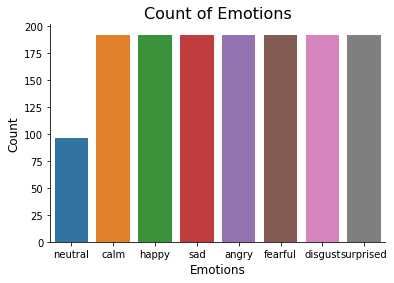

In [5]:
plt.title('Count of Emotions', size=16)
sns.countplot(df.Emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

## Waveplot & Spectogram Function

---

In [6]:
def create_waveplot(data, samp_rate, emotion):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {emotion} emotion', size=15)
    lib_display.waveshow(data, sr=samp_rate)
    plt.show()

def create_spectrogram(data, samp_rate, emotion):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    # print(f"X : {X}")
    Xdb = librosa.amplitude_to_db(np.abs(X))
    plt.figure(figsize=(12, 3)) #12 inchs X 3 inchs 
    plt.title(f'Spectrogram for audio with {emotion} emotion', size=15)
    lib_display.specshow(Xdb, sr=samp_rate, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()
    return Xdb

## Data Augmentation Function

---
> Adding

> - Noise

> - Stretch

> - Shift

> - Pitch

In [7]:

def noise(data):
    noise_amp = 0.025*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    """
        data: Main Audio
        Rate: The rate in which the audio is being slowed or fast
        FROMULA/ Function  : librosa.effects.time_stretch(data, rate)
    """
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    """
        data: it takes only audio data as parameter
        returns np array of new audio
    """
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


# Example of Waveplot, Spectogram & Data Augmentation

---

In [8]:
import ipywidgets.widgets as wdg 
emos = df.Emotion.unique()
# print(emos)
emo_wdg = wdg.Dropdown(
    options=emos,
    value=emos[0],
    description='Emotion',
    disabled=False,
)

emo_wdg

Dropdown(description='Emotion', options=('neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'su…

03-01-01-01-01-01-10.wav


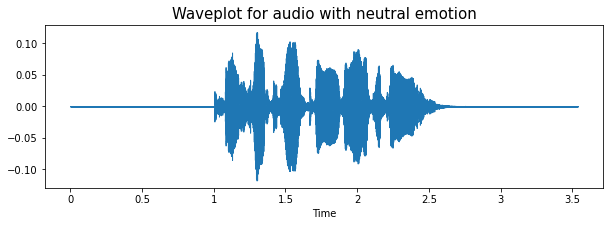

array([[-45.871902, -52.98672 , -52.98672 , ..., -52.98672 , -52.98672 ,
        -41.699425],
       [-46.52343 , -47.9059  , -52.98672 , ..., -47.084328, -43.891434,
        -44.811157],
       [-44.90694 , -40.361923, -46.52565 , ..., -52.98672 , -37.299446,
        -36.042217],
       ...,
       [-52.98672 , -52.98672 , -52.98672 , ..., -52.98672 , -52.98672 ,
        -52.98672 ],
       [-52.98672 , -52.98672 , -52.98672 , ..., -52.98672 , -52.98672 ,
        -52.98672 ],
       [-52.98672 , -52.98672 , -52.98672 , ..., -52.98672 , -52.98672 ,
        -52.98672 ]], dtype=float32)

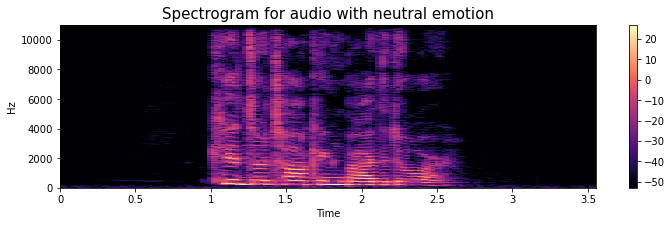

In [9]:
import numpy as np
import random as rnd

emotion=emo_wdg.value
path = rnd.choice(np.array(df.Path[df.Emotion==emotion]))
print(path.split("\\")[-1])
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
# ipd.Audio(path)


03-01-01-01-01-01-10.wav


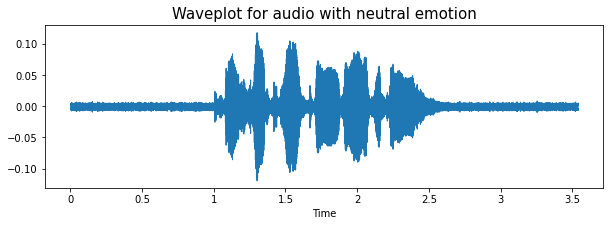

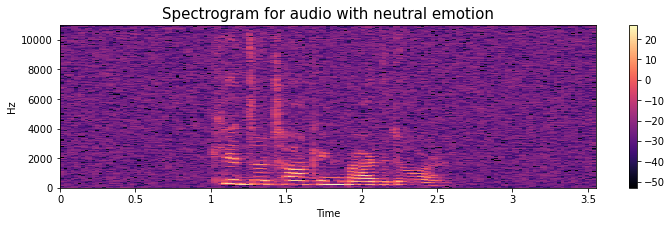

In [10]:
# taking any example and checking for techniques.
# path = np.array(df.Path)[1]
print(path.split("\\")[-1])

data, sample_rate = librosa.load(path)

noise_added_data = noise(data)
create_waveplot(noise_added_data, sampling_rate, emotion)
noise_image = create_spectrogram(noise_added_data, sampling_rate, emotion)

03-01-01-01-01-01-10.wav


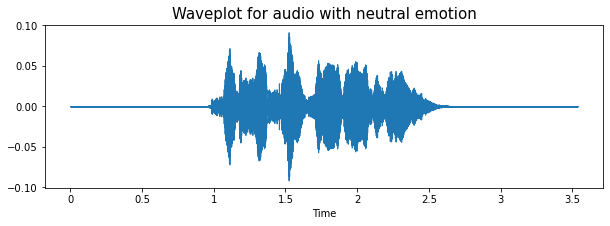

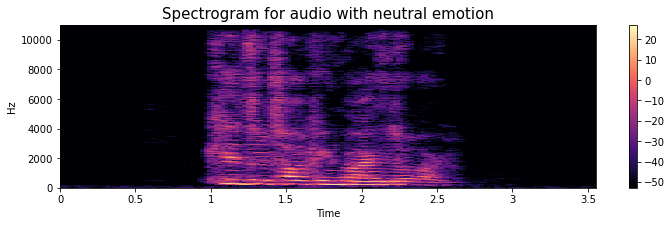

In [11]:
print(path.split("\\")[-1])

data, sample_rate = librosa.load(path)

pitch_added_data = pitch(data,sample_rate,0.4)
create_waveplot(pitch_added_data, sampling_rate, emotion)
pitch_changed_audio = create_spectrogram(pitch_added_data, sampling_rate, emotion)

03-01-01-01-01-01-10.wav


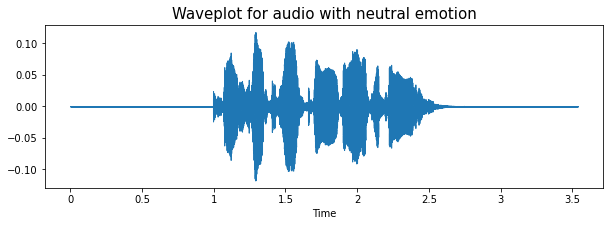

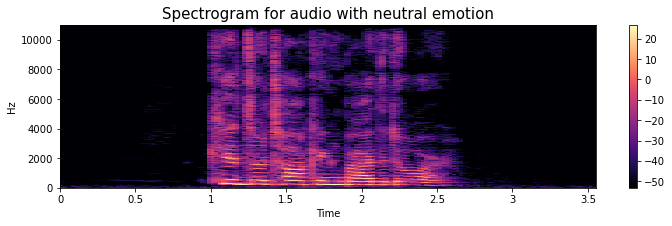

In [12]:
print(path.split("\\")[-1])

data, sample_rate = librosa.load(path)

shift_added_data = shift(data)
create_waveplot(shift_added_data, sampling_rate, emotion)
shift_changed_audio = create_spectrogram(shift_added_data, sampling_rate, emotion)

03-01-01-01-01-01-10.wav


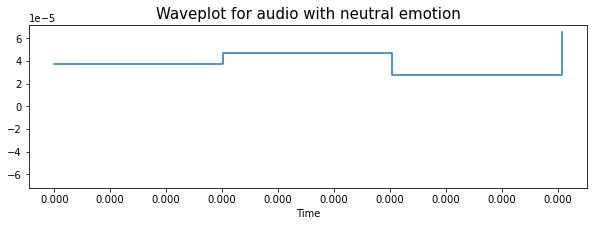

C:\Users\PRITAM\AppData\Roaming\Python\Python39\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=4
  warnings.warn(


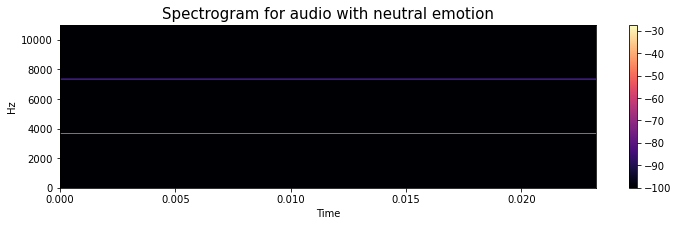

In [13]:
print(path.split("\\")[-1])

data, sample_rate = librosa.load(path)

Stretched_data = stretch(data,sample_rate)
create_waveplot(Stretched_data, sampling_rate, emotion)
Stretched_audio = create_spectrogram(Stretched_data, sampling_rate, emotion)

<class 'numpy.ndarray'>


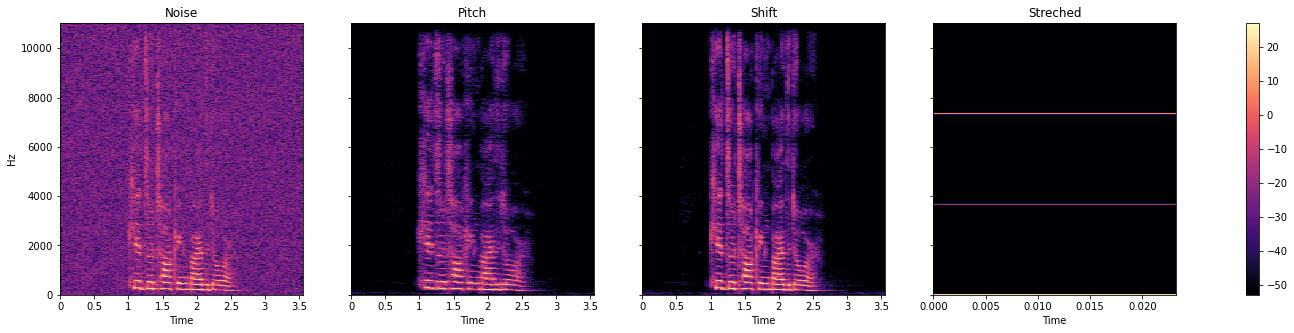

In [15]:
# Construct a subplot grid with 3 rows and 1 column, sharing the x-axis)
fig, ax = plt.subplots(nrows=1 , ncols=4,sharey=True)
print(type(ax))

# On the first subplot, show the original spectrogram
audio_file_selected = path.split("\\")[-1]
plt.title(f"File - {audio_file_selected}  || Emotion - {emotion}")

img1 = lib_display.specshow(noise_image, sr=sample_rate, x_axis='time', y_axis='hz',ax=ax[0])
ax[0].set(title='Noise')

# On the second subplot, show the mel spectrogram
img2 = lib_display.specshow(pitch_changed_audio, sr=sample_rate, x_axis='time', y_axis='hz',ax=ax[1])
ax[1].set(title='Pitch')

# On the third subplot, show the chroma features
img3 = lib_display.specshow(shift_changed_audio, sr=sample_rate, x_axis='time', y_axis='hz',ax=ax[2])
ax[2].set(title='Shift')

img4 =  lib_display.specshow(Stretched_audio, sr=sample_rate, x_axis='time', y_axis='hz',ax=ax[3])
ax[3].set(title='Streched')

fig.set_figheight(5)
fig.set_figwidth(25)

# To eliminate redundant axis labels, we'll use "label_outer" on all subplots:
for ax_i in ax:
    ax_i.label_outer()

# And we can share colorbars:
fig.colorbar(img1,ax=ax)
# fig.colorbar(img4,ax=[ax[1][0],ax[1][1]])


# [Link](https://librosa.org/doc/main/auto_examples/plot_display.html)


---

## Main Feature Extraction For All Audio

---

In [25]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    # print(f"Dim of Org Audio - {res1.ndim}, Len(Org Audio) - {len(res1)}")
    result = np.array(res1)
    
    # # data with noise
    # noise_data = noise(data)
    # res2 = extract_features(noise_data)
    # result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    stretch_data = stretch(data)
    res2 = extract_features(stretch_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    data_pitch = pitch(data, sample_rate)
    res3 = extract_features(data_pitch)
    
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [64]:
get_features(path).size

486

In [32]:
df.columns[0]

'Emotion'

In [45]:
from ipywidgets import IntProgress
from IPython.display import display

no_of_aud = 1440*3

f = IntProgress(value=0,\
                min=0,\
                max=no_of_aud, 
                bar_style='success',\
                description='Extracting Features:',\
                orientation='horizontal'\
                ) # instantiate the bar


In [65]:
c = 0
display(f)
Features,Labels = [],[]
for emo,aud_path in zip(df.Emotion,df.Path):
    aud_features = get_features(aud_path) #162 features per 3 audio [org, stretch, pitch]
    for ele in aud_features:
        Features.append(ele)
        Labels.append(emo)
        c += 1 
        f.value = c  
    

IntProgress(value=4320, bar_style='success', description='Extracting Features:', max=4320)

In [69]:
len(Features),len(Labels)

(4320, 4320)

In [68]:
Extracted_Features_DF = pd.DataFrame(Features)
Extracted_Features_DF['labels'] = Labels
Extracted_Features_DF.to_csv('features_org_stretch_pitch.csv', index=False)

In [72]:
feature_file= os.path.abspath('features_org_stretch_pitch.csv')
feature_df = pd.read_csv(feature_file,index_col=False)

In [75]:
feature_df.head(4)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.300781,0.706492,0.756853,0.735217,0.731014,0.715156,0.667529,0.673754,0.722173,0.748969,...,0.000004,0.000003,2.153285e-06,0.000002,5.131693e-06,0.000008,0.000005,2.270858e-06,1.642365e-07,neutral
1,0.177941,0.666223,0.739900,0.736050,0.716271,0.731358,0.682439,0.657732,0.707099,0.744029,...,0.000002,0.000002,8.686418e-07,0.000001,2.447462e-06,0.000004,0.000003,1.086569e-06,9.836941e-08,neutral
2,0.184796,0.650088,0.705284,0.766884,0.740786,0.715097,0.685506,0.656952,0.712487,0.744546,...,0.000002,0.000002,1.663092e-06,0.000001,8.168943e-07,0.000002,0.000002,8.497095e-07,4.750486e-08,neutral
3,0.271272,0.674966,0.723259,0.724594,0.681302,0.670643,0.674574,0.630036,0.680146,0.708276,...,0.000007,0.000007,6.670963e-06,0.000007,1.217880e-05,0.000009,0.000008,2.638513e-06,1.788902e-07,neutral
